In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as sbp
import numpy as np
import sys
sys.path += ["../src"]
sys.path += ["../src/generation"]
sys.path += ["../src/evaluation"]

In [2]:
paper_palette = ["#009ADE", "#AF58BA", "#F28523"]

### Figure 1 - Maps

In [ ]:
import geopandas as gpd
import sys
import config
from _ import  load_geo_data
import pickle
import matplotlib.ticker as ticker


In [ ]:
geo_dict = load_geo_data()

In [5]:
pal = [sns.color_palette("colorblind")[7], sns.color_palette("colorblind")[3]]

In [ ]:
prov = "BO"
file = config.isp_baselines + f'all_baselines_{prov}.pickle'

with open(file, 'rb') as f:
    data = pickle.load(f)

polyg = data["polyg"]


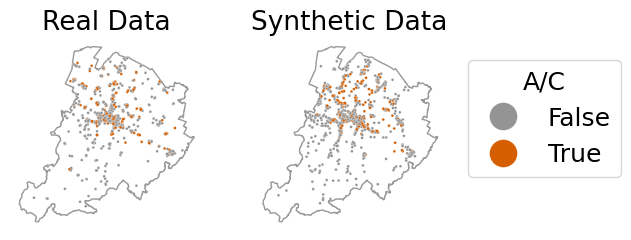

In [ ]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (6,2.5), sharex = True, sharey = True)

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

for k,(method,title) in enumerate(zip(['df_real','df_nfvae'],
                           ['Real Data', 'Synthetic Data'])):
    
    polyg["geometry"].plot(ax = axes[k], color = "white", alpha = 0.4, edgecolor = "black")

    df_plot = data[method]
    
    sns.scatterplot(data = df_plot.sample(1000, random_state = 13).assign(flag_air_conditioning = lambda x: (x["flag_air_conditioning"] + 0.) > 0),
                    hue = "flag_air_conditioning", palette = pal,
                    x = "x", y = "y", s = 4, ax = axes[k])
    
    axes[k].set_title(title, fontsize = 19)
    axes[k].get_xaxis().set_visible(False)
    axes[k].get_yaxis().set_visible(False)
    axes[k].legend(fontsize = 18, markerscale = 10, title_fontsize = 18,bbox_to_anchor = (1.05, 0.95)).set_title("A/C")
    axes[k].spines[["right", "top", "left", "bottom"]].set_visible(False)

axes[0].get_legend().remove()


fig.savefig("../paper/maps_BO_air_conditioning.png", format = "png",  bbox_inches='tight')


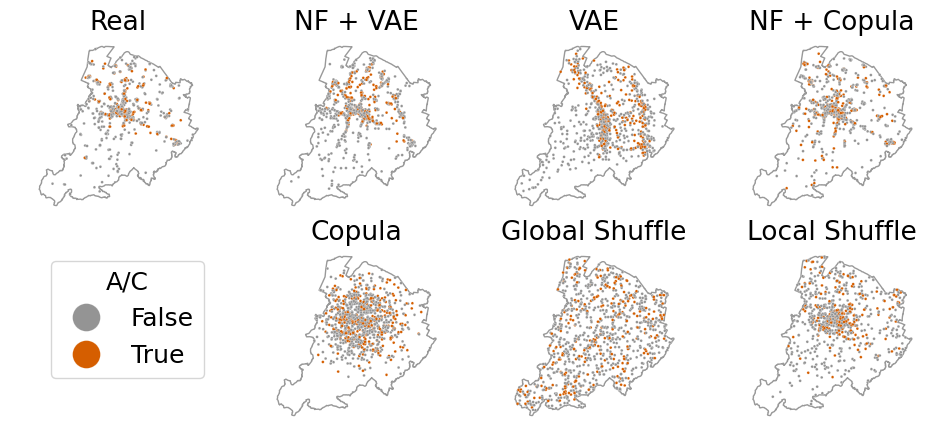

In [ ]:
fig, axes = sbp(ncols = 4, nrows = 2, figsize = (12,5), sharex = True, sharey = True)

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

for k,(method,title) in enumerate(zip(['df_real','df_nfvae','df_ablation','df_copula_nf','','df_copula','df_shuffle_global','df_shuffle_local'],
                           ['Real', 'NF + VAE', 'VAE','NF + Copula','','Copula','Global Shuffle','Local Shuffle'])):
    i,j = divmod(k,4)
    if method == '':
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].spines[["right", "top", "left", "bottom"]].set_visible(False)
        continue

    polyg["geometry"].plot(ax = axes[i,j], color = "white", alpha = 0.4, edgecolor = "black")

    df_plot = data[method]
    
    sns.scatterplot(data = df_plot.sample(1000, random_state = 13).assign(flag_air_conditioning = lambda x: (x["flag_air_conditioning"] + 0.) > 0),
                    hue = "flag_air_conditioning", palette = pal,
                    x = "x", y = "y", s = 4, ax = axes[i,j])
    
    axes[i,j].set_title(title, fontsize = 19)
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    axes[i,j].legend().set_visible(False)
    axes[i,j].spines[["right", "top", "left", "bottom"]].set_visible(False)
axes[1,1].legend(fontsize = 18, markerscale = 10, title_fontsize = 18,bbox_to_anchor = (-.3, 1.)).set_title("A/C")


fig.savefig("../paper/maps_BO_air_conditioning_all_methods.png", format = "png",  bbox_inches='tight')


In [ ]:
prov = "NA"
file = config.isp_baselines + f'all_baselines_{prov}.pickle'

with open(file, 'rb') as f:
    data = pickle.load(f)

polyg = data["polyg"]


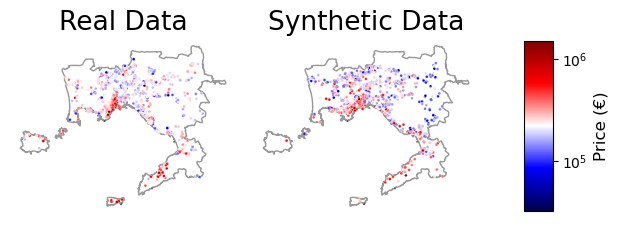

In [ ]:
fig, axes = sbp(ncols = 3, nrows = 1, figsize = (7,2.5), sharex = True, sharey = True, gridspec_kw={'width_ratios': [4,4, 1]})

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)


for k,(method,title) in enumerate(zip(['df_real','df_nfvae'],
                           ['Real Data', 'Synthetic Data'])):
    
    polyg["geometry"].plot(ax = axes[k], color = "white", alpha = 0.4, edgecolor = "black")

    df_plot = data[method]
    
    sns.scatterplot(data = df_plot.sample(1000, random_state = 13),
                    hue = "log_price",
                    palette = "seismic",
                    hue_norm = (10., 14.),
                    
                    x = "x", y = "y", s = 4, ax = axes[k])
    
    axes[k].set_title(title, fontsize = 19)
    axes[k].get_xaxis().set_visible(False)
    axes[k].get_yaxis().set_visible(False)
    axes[k].legend().set_visible(False) 
    axes[k].spines[["right", "top", "left", "bottom"]].set_visible(False)

prices = np.exp(data["df_real"]["log_price"])
norm = plt.Normalize(np.log10(prices).min(), np.log10(prices).max())
sm = plt.cm.ScalarMappable(cmap = "seismic", norm = norm)
sm.set_array([])

log_ticks = np.arange(1,20)
ticks = np.exp(log_ticks)

fmt = ticker.FuncFormatter(lambda x, pos: rf"$10^{{{int(round((x)))}}}$")

axes[2].figure.colorbar(sm, aspect = 6, fraction = 0.5, format = fmt,
                         ticks = log_ticks).set_label("Price (€)", fontsize = 12)
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
    
axes[2].spines[["right", "top", "left", "bottom"]].set_visible(False)


fig.savefig("../paper/maps_NA_log_price.png", format = "png",  bbox_inches='tight')


In [ ]:
prov = "TO"
file = config.isp_baselines + f'all_baselines_{prov}.pickle'

with open(file, 'rb') as f:
    data = pickle.load(f)

polyg = data["polyg"]


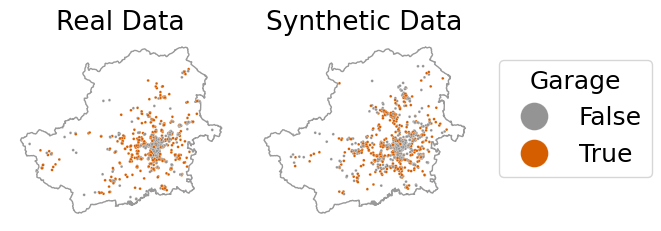

In [21]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (6,2.5), sharex = True, sharey = True)

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

for k,(method,title) in enumerate(zip(['df_real','df_nfvae'],
                           ['Real Data', 'Synthetic Data'])):
    
    polyg["geometry"].plot(ax = axes[k], color = "white", alpha = 0.4, edgecolor = "black")

    df_plot = data[method]
    
    sns.scatterplot(data = df_plot.sample(1000, random_state = 13).assign(flag_garage = lambda x: (x["flag_garage"] + 0.) > 0),
                    hue = "flag_garage", palette = pal,
                    x = "x", y = "y", s = 4, ax = axes[k])
    
    axes[k].set_title(title, fontsize = 19)
    axes[k].get_xaxis().set_visible(False)
    axes[k].get_yaxis().set_visible(False)
    axes[k].legend(fontsize = 18, markerscale = 10, title_fontsize = 18,bbox_to_anchor = (1.05, 0.95)).set_title("Garage")
    axes[k].spines[["right", "top", "left", "bottom"]].set_visible(False)

axes[0].get_legend().remove()


fig.savefig(f"../paper/maps_{prov}_garage.png", format = "png",  bbox_inches='tight')


In [ ]:
prov = "RM"
file = config.isp_baselines + f'all_baselines_{prov}.pickle'

with open(file, 'rb') as f:
    data = pickle.load(f)

polyg = data["polyg"]


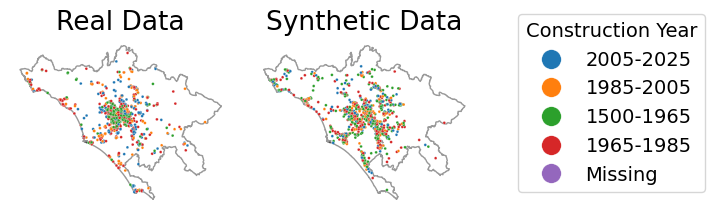

In [37]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (6,2.5), sharex = True, sharey = True)

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

for k,(method,title) in enumerate(zip(['df_real','df_nfvae'],
                           ['Real Data', 'Synthetic Data'])):
    
    polyg["geometry"].plot(ax = axes[k], color = "white", alpha = 0.4, edgecolor = "black")

    df_plot = data[method]
    df_plot["Construction Year"] = pd.from_dummies(data["df_real"][[u for u in data["df_real"].columns if "ANNO" in u]].rename(columns = {u: u.replace("ANNO_COSTRUZIONE_", "").replace("_", "-") for u in data["df_real"].columns}))

    
    sns.scatterplot(data = df_plot.sample(1000, random_state = 13),
                    hue = "Construction Year", #palette = pal,
                    x = "x", y = "y", s = 4, ax = axes[k])
    
    axes[k].set_title(title, fontsize = 19)
    axes[k].get_xaxis().set_visible(False)
    axes[k].get_yaxis().set_visible(False)
    axes[k].legend(fontsize = 14, markerscale = 7, title_fontsize = 14,bbox_to_anchor = (1.15, 1.2)).set_title("Construction Year")
    axes[k].spines[["right", "top", "left", "bottom"]].set_visible(False)

axes[0].get_legend().remove()


fig.savefig(f"../paper/maps_{prov}_construction.png", format = "png",  bbox_inches='tight')


In [ ]:
prov = "AO"
file = config.isp_baselines + f'all_baselines_{prov}.pickle'

with open(file, 'rb') as f:
    data = pickle.load(f)

polyg = data["polyg"]


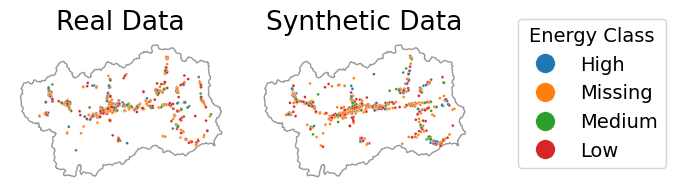

In [47]:
fig, axes = sbp(ncols = 2, nrows = 1, figsize = (6,2.5), sharex = True, sharey = True)

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

for k,(method,title) in enumerate(zip(['df_real','df_nfvae'],
                           ['Real Data', 'Synthetic Data'])):
    
    polyg["geometry"].plot(ax = axes[k], color = "white", alpha = 0.4, edgecolor = "black")

    df_plot = data[method]
    df_plot["Energy Class"] = pd.from_dummies(data["df_real"][[u for u in data["df_real"].columns if "energy" in u]].rename(columns = {u: u.replace("_energy_class", "") for u in data["df_real"].columns}))

    
    sns.scatterplot(data = df_plot.sample(1000, random_state = 13),
                    hue = "Energy Class", #palette = pal,
                    x = "x", y = "y", s = 4, ax = axes[k])
    
    axes[k].set_title(title, fontsize = 19)
    axes[k].get_xaxis().set_visible(False)
    axes[k].get_yaxis().set_visible(False)
    axes[k].legend(fontsize = 14, markerscale = 7, title_fontsize = 14,bbox_to_anchor = (1.15, 1.2)).set_title("Energy Class")
    axes[k].spines[["right", "top", "left", "bottom"]].set_visible(False)

axes[0].get_legend().remove()


fig.savefig(f"../paper/maps_{prov}_energy.png", format = "png",  bbox_inches='tight')


### Figure 3 - Boxplots

In [ ]:
n_houses = pd.read_csv(config.path_isp + f"n_houses_prov_isp.csv", index_col = 0)

In [ ]:
df_wsd = pd.read_csv(config.path_isp + f"fidelity_wasserstein_geo_isp.csv", index_col = 0)

df_geo_features = pd.read_csv(config.path_isp + f"fidelity_grid_geo_features_pca_isp.csv", index_col = 0).T
weighting= "dist_threshold"

df_moran = pd.read_csv(config.path_isp + f"fidelity_moran_{weighting}_isp.csv", index_col = 0)
df_moran = df_moran.apply(lambda x: np.abs(x - x["df_real"]), axis = 1)

df_corr = pd.read_csv(config.path_isp + f"fidelity_correlation_features_isp.csv", index_col = 0).T
df_corr = df_corr.apply(lambda x: (x - x.mean()) / x.std(), axis = 1)

df_zerocell = pd.read_csv(config.path_isp + f'zero_cell_isp.csv', index_col = 0)

df_utility = pd.read_csv(config.path_isp + f'utility_r2_hedonic.csv', index_col = 0)
df_utility = (df_utility["df_real"] - df_utility.T).T


# euclidean norm1
metric = "euclidean"
mia_auc_roc = pd.read_csv(config.path_isp + f'privacy_MIA_{metric}.csv')
df_privacy = (mia_auc_roc.dropna()
              .query("classifier == 'Logistic Regression'")
              .set_index(["pop_name", "prov"]).drop(columns = ["classifier"]).unstack()
              .apply(lambda x: (x - 0.5))
              .T.rename(columns = {u: u.replace("95", "") for u in mia_auc_roc["pop_name"].unique()})
              .loc["score"]
              )

df_privacy.index.name = None
df_privacy.columns.name = None

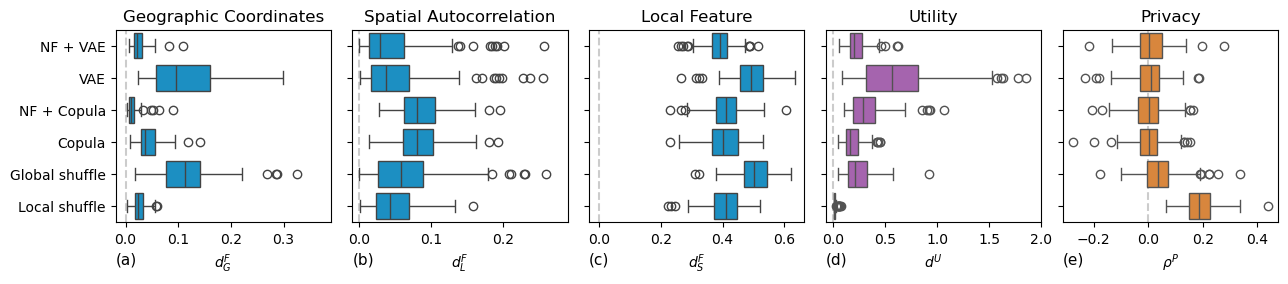

In [ ]:
fig, axes = sbp(figsize = (15,2.5), ncols = 5, sharey = True)

fig.subplots_adjust(wspace = 0.1)
dict_save = {}
for k, (df_, title) in enumerate(zip([df_wsd, df_moran, df_geo_features, df_utility, df_privacy.assign(df_real = 0)], ["Geographic Coordinates", "Spatial Autocorrelation", "Local Feature", r"Utility", "Privacy"])):
    for col in ["df_real", "df_shuffle_cap_bins", "df_shuffle_province_bins"]:
        if col in df_.columns:
            df_ = df_.drop(columns = [col])
    df_ = df_.rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_ablation": "VAE",
                                           "df_copula_nf": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
    dict_save[title] = df_[["NF + VAE", "VAE", "NF + Copula", "Copula", "Global shuffle", "Local shuffle"]]
    axes[k].axvline(0, color = "grey", linestyle = "--", alpha = 0.4)

    sns.boxplot(data = (df_
                        .rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_ablation": "VAE",
                                           "df_copula_nf": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
                        .stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"})),
                x = "metric",
                y = "method",
                order = ["NF + VAE", "VAE", "NF + Copula", "Copula", "Global shuffle", "Local shuffle"],
                color = [paper_palette[u] for u in [0,0,0,1,2]][k],
                ax = axes[k]
                )
    axes[k].set_title(title)
    axes[k].set_xlabel([r"$d^F_G$", r"$d^F_L$", r"$d^F_S$", r"$d^U$", r"$\rho^P$"][k])
    axes[k].set_ylabel("")
    xt, _ = axes[k].get_xlim()
    xt += [0.01,0.025,0,0.45,0][k]
    axes[k].set_xlim(xt, [0.39, 0.29, _, 2, _][k])
    axes[k].text(xt,6.8, f'({["a", "b", "c", "d", "e"][k]})', fontsize = 11)

fig.savefig("../paper/boxplots_distances.pdf", format = "pdf", bbox_inches = "tight")

#### Table with statistic plots: 


In [23]:
data_all = pd.DataFrame()
for key in dict_save.keys():
    data = dict_save[key]
    statistics = data.describe().loc[['mean','min', 'max', '25%', '50%', '75%']]
    statistics.loc['min-max',:]= [f"[{statistics.loc['min', u]:.3f} , {statistics.loc['max', u]:.3f}]" for u in statistics.columns]
    statistics.loc['Scenario',:]= key
    statistics.drop(index=['min','max'],inplace=True)
    statistics=statistics.loc[['Scenario','mean','min-max','25%','50%','75%'],:]
    statistics.rename(index={'mean':'Mean', '25%':'Q1($25\%$)', '50%':'Median ($50\%$)', '75%':r'Q3 ($75\%$)'}, inplace=True)
    # Reorder columns
    statistics=statistics.loc[:,["NF + VAE", "VAE", "NF + Copula", "Copula", "Global shuffle", "Local shuffle"]]
    data_all = pd.concat([data_all, statistics])
data_all
data_all.to_latex("../paper/table_boxplots_all_metrics.tex", float_format="%.3f")

In [61]:
data_all

,NF + VAE,VAE,NF + Copula,Copula,Global shuffle,Local shuffle
Scenario,Geographic Coordinates,Geographic Coordinates,Geographic Coordinates,Geographic Coordinates,Geographic Coordinates,Geographic Coordinates
Mean,0.025866,0.119626,0.012869,0.043184,0.117998,0.025821
min-max,"[0.007 , 0.109]","[0.024 , 0.582]","[0.002 , 0.090]","[0.009 , 0.141]","[0.018 , 0.325]","[0.003 , 0.059]"
Q1($25\%$),0.015969,0.057413,0.005865,0.028285,0.075858,0.016952
Median ($50\%$),0.022368,0.095488,0.009349,0.03713,0.112203,0.023573
Q3 ($75\%$),0.031892,0.160281,0.01629,0.0555,0.141224,0.032564
Scenario,Spatial Autocorrelation,Spatial Autocorrelation,Spatial Autocorrelation,Spatial Autocorrelation,Spatial Autocorrelation,Spatial Autocorrelation
Mean,0.04854,0.055456,0.086311,0.083584,0.071529,0.047946
min-max,"[0.000 , 0.258]","[0.001 , 0.255]","[0.027 , 0.196]","[0.014 , 0.193]","[0.000 , 0.688]","[0.001 , 0.159]"
Q1($25\%$),0.013035,0.016865,0.062206,0.061122,0.025746,0.023009


### Correlation distance

In [ ]:
df_corr = pd.read_csv(config.path_isp + f"fidelity_correlation_features_isp.csv", index_col = 0).T


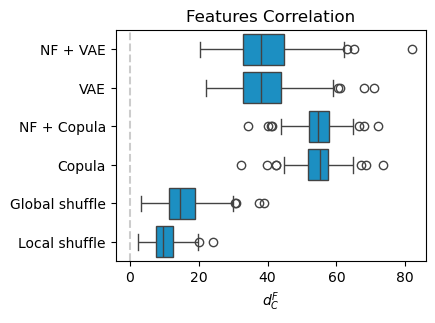

In [ ]:
fig, axes = sbp(figsize = (4,3))

axes.axvline(0 , color = "grey", alpha = 0.4, linestyle = "--")

sns.boxplot(data = (df_corr
                        .drop(columns = ["df_real", "df_shuffle_cap_bins", "df_shuffle_province_bins"])
                        .rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_ablation": "VAE",
                                           "df_copula_nf": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
                        .stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"})
                        ),
                x = "metric",
                y = "method",
                color = paper_palette[0]
                )

axes.set_title("Features Correlation")
axes.set_xlabel(r"$d^F_C$")
axes.set_ylabel("")

fig.savefig("../paper/boxplot_correlations_sm.pdf", format = "pdf", bbox_inches='tight')

In [ ]:
prov = "BA"
file = config.path_isp_baselines + f'all_baselines_{prov}.pickle'

with open(file, 'rb') as f:
    data = pickle.load(f)

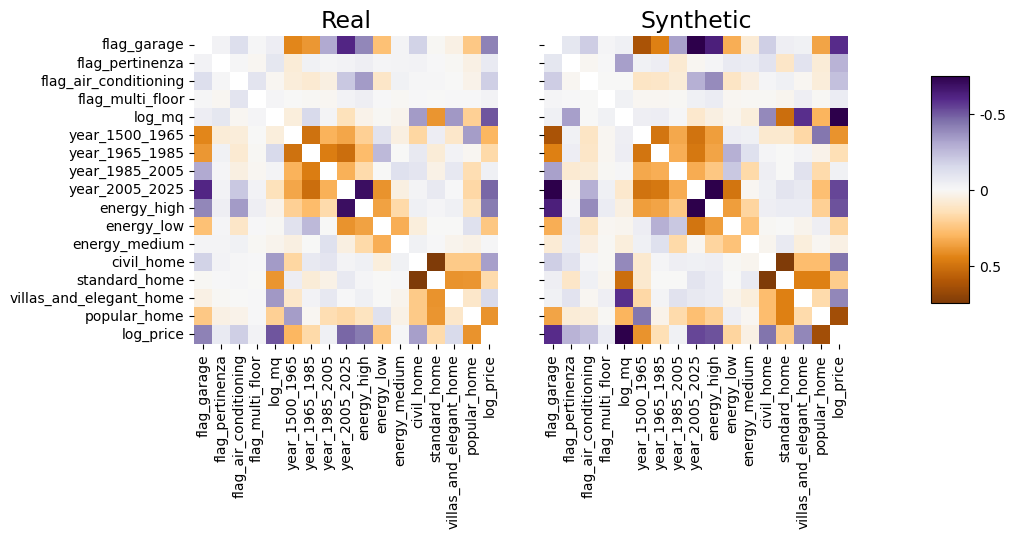

In [ ]:
v = 0.6
fig, axes = sbp(ncols = 3, figsize = (10,4), gridspec_kw={'width_ratios': [4,4, 1]}, sharey = True)


for j,(df_, title) in enumerate(zip([data["df_real"], data["df_nfvae"]], ["Real", "Synthetic"])):
    sns.heatmap(df_
                .drop(columns = ["x", "y", "Missing_energy_class", "floor_Missing", "flag_air_conditioning_Missing", "flag_multi_floor_Missing","ANNO_COSTRUZIONE_Missing",
                                    'floor_0.0', 'floor_1.0', 'floor_2.0', 'floor_3.0', 'floor_Missing', 'floor_plus_4'])
                .rename(columns = {u: u.replace("ANNO_COSTRUZIONE_", "year_").replace("High_energy_class", "energy_high")
                                   .replace("Medium_energy_class", "energy_medium").replace("Low_energy_class", "energy_low")
                                    .replace("COD_CAT_A02", "civil_home").replace("COD_CAT_A03", "standard_home").replace("COD_CAT_A_04_05", "popular_home").replace("COD_CAT_A_01_07_08", "villas_and_elegant_home") for u in df_.columns})
                .corr().replace(1, np.nan),
                                    vmin = -v, vmax = v,
                                    cmap = "PuOr",
                                    cbar = False,
                                    ax = axes[j])
    axes[j].set_title(title, fontsize = 17)
axes[2].set_visible(False)
sm = plt.cm.ScalarMappable(cmap = "PuOr")
sm.set_array([])

l = 0.5
l_trans = l / v
axes[2].figure.colorbar(sm, aspect = 6, fraction = 0.5, #format = fmt,
                         ticks = [l_trans, 0.5, 1 - l_trans],
                         ).set_ticklabels([-l, 0, l])

fig.savefig("../paper/heatmap_correlations_BO_sm.pdf", format = "pdf", bbox_inches='tight')


### Zero cell

In [ ]:
df_zerocell = pd.read_csv(config.path_isp + f'zero_cell_isp.csv', index_col = 0).T

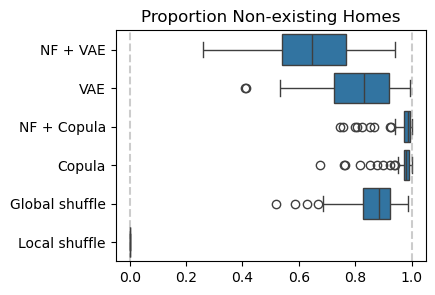

In [ ]:
fig, axes = sbp(figsize = (4,3))

sns.boxplot(data = (df_zerocell
                        .drop(columns = ["df_real", "df_shuffle_cap_bins", "df_shuffle_province_bins"])
                        .rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_ablation": "VAE",
                                           "df_copula_nf": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
                        .stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"})
                        .assign(metric = lambda x: 1 - x["metric"])
                        ),
                x = "metric",
                y = "method",
                )

axes.set_title("Proportion Non-existing Homes")
axes.set_xlabel("")
axes.set_ylabel("")

axes.axvline(0, color = "grey", linestyle = "--", alpha = 0.4)
axes.axvline(1, color = "grey", linestyle = "--", alpha = 0.4)

fig.savefig("../paper/boxplot_zerocell_sm.pdf", format = "pdf", bbox_inches='tight')

In [7]:
1 - df_zerocell.median()

df_real                     0.000000
df_nfvae                    0.646869
df_ablation                 0.830846
df_copula_nf                0.931542
df_copula_ablation          0.943098
df_shuffle_province_bins    0.877333
df_shuffle_cap_bins         0.000000
df_shuffle_province_num     0.885026
df_shuffle_cap_num          0.000000
dtype: float64

### Robustness Moran

In [ ]:
weighting= "nearest_k"
df_moran = pd.read_csv(config.path_isp + f"fidelity_moran_{weighting}_isp.csv", index_col = 0)
df_moran = df_moran.apply(lambda x: np.abs(x - x["df_real"]), axis = 1)


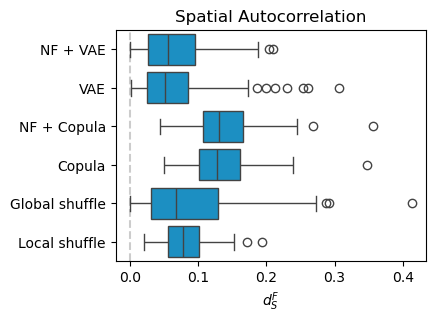

In [ ]:
fig, axes = sbp(figsize = (4,3))

axes.axvline(0, color = "grey", alpha = 0.4, linestyle = "--")
sns.boxplot(data = (df_moran
                        .drop(columns = ["df_real", "df_shuffle_cap_bins", "df_shuffle_province_bins"])
                        .rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_ablation": "VAE",
                                           "df_copula_nf": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
                        .stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"})
                        ),
                color = paper_palette[0],
                x = "metric",
                y = "method",
                )

axes.set_title("Spatial Autocorrelation")
axes.set_xlabel(r"$d^F_S$")
axes.set_ylabel("")

fig.savefig("../paper/boxplot_moran_sm.pdf", format = "pdf", bbox_inches='tight')

### AirBnB boxplots

In [ ]:
df_wsd = pd.read_csv(config.path_airbnb + "similarity_wasserstein_geo_airbnb.csv", index_col = 0)

df_geo_features = pd.read_csv(config.path_airbnb + "fidelity_grid_geo_features_pca_airbnb.csv", index_col = 0).T

weighting= "dist_threshold"
#weighting= "nearest_k"
df_moran = pd.read_csv(config.path_airbnb + "fidelity_moran_{weighting}_airbnb.csv", index_col = 0)
df_moran = df_moran.apply(lambda x: np.abs(x - x["df_real"]), axis = 1)
#df_moran = df_moran.apply(lambda x: (x - x.mean()) / x.std(), axis = 1)

df_r2 = pd.read_csv(config.path_airbnb + "utility_airbnb.csv", index_col = 0)
df_r2 = (df_r2["df_real"] - df_r2.T).T
#df_r2 = df_r2.apply(lambda x: (x - x.mean()) / x.std(), axis = 1)


# euclidean norm1
metric = "euclidean"
mia_auc_roc = pd.read_csv(config.path_airbnb + f"MIA_auc_roc_{metric}_airbnb.csv")

df_privacy = (mia_auc_roc.dropna()
              .query("classifier == 'Logistic Regression'")
              .set_index(["pop_name", "city"]).drop(columns = ["classifier"]).unstack()
              .apply(lambda x: (x - 0.5))
              .T.rename(columns = {u: u.replace("95", "") for u in mia_auc_roc["pop_name"].unique()})
              .loc["score"]
              )

df_privacy.index.name = None
df_privacy.columns.name = None



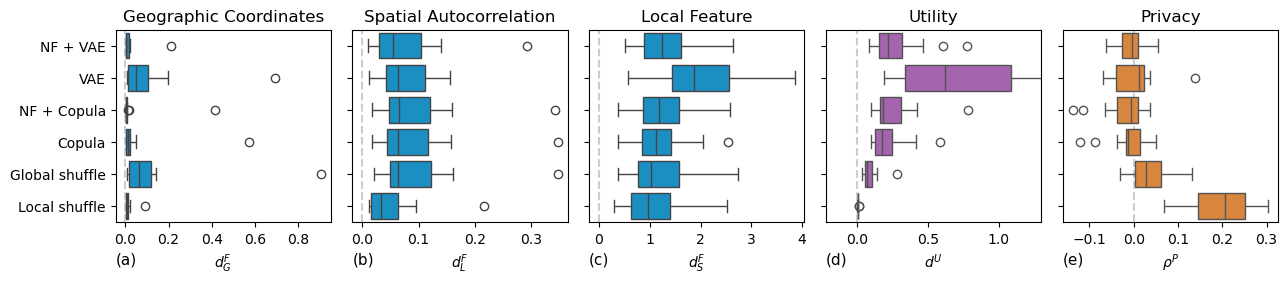

In [ ]:
fig, axes = sbp(figsize = (15,2.5), ncols = 5, sharey = True)

dict_save = {}
fig.subplots_adjust(wspace = 0.1)
for k, (df_, title) in enumerate(zip([df_wsd, df_moran, df_geo_features,df_r2, df_privacy.assign(df_real = 0)], ["Geographic Coordinates", "Spatial Autocorrelation", "Local Feature", r"Utility", "Privacy"])):
    axes[k].axvline(0, color = "grey", linestyle = "--", alpha = 0.4)

    for col in ["df_real"]:
        if col in df_.columns:
            df_ = df_.drop(columns = [col])
        
        df_.rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_vae": "VAE",
                                           "df_nf_copula": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"},inplace=True)
        dict_save[title] = df_[["NF + VAE", "VAE", "NF + Copula", "Copula", "Global shuffle", "Local shuffle"]]


    sns.boxplot(data = (df_
                        .rename(columns = {"df_nfvae": "NF + VAE", 
                                           "df_vae": "VAE",
                                           "df_nf_copula": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
                        .stack().reset_index().rename(columns = {"level_0": "prov","level_1": "method", 0: "metric"})),
                x = "metric",
                y = "method",
                color = [paper_palette[u] for u in [0,0,0,1,2]][k],
                order = ["NF + VAE", "VAE", "NF + Copula", "Copula", "Global shuffle", "Local shuffle"],
                ax = axes[k]
                )
    axes[k].set_title(title)
    axes[k].set_xlabel([r"$d^F_G$", r"$d^F_L$", r"$d^F_S$", r"$d^U$", r"$\rho^P$"][k])
    axes[k].set_ylabel("")
    xt, _ = axes[k].get_xlim()
    #xt += [0.04,0,0,6.13,0][k]
    axes[k].set_xlim(xt, [_, _, _, 1.3, _][k])
    axes[k].text(xt,6.8, f'({["a", "b", "c", "d", "e"][k]})', fontsize = 11)

fig.savefig("../paper/boxplots_distances_airbnb.pdf", format = "pdf", bbox_inches = "tight")

### Fig SM - Privacy

In [ ]:
# euclidean norm1
metric = "euclidean"
mia_auc_roc = pd.read_csv(config.path_isp + f'MIA_auc_roc_{metric}.csv')

In [ ]:
remove_pops = ['df_real']
df_privacy_all = (mia_auc_roc
                  .replace({u: u.replace("95", "") for u in mia_auc_roc["pop_name"].unique()})
                  .replace({"df_nfvae": "NF + VAE", 
                                           "df_ablation": "VAE",
                                           "df_copula_nf": "NF + Copula",
                                           "df_copula": "Copula",
                                           "df_shuffle_global": "Global shuffle",
                                           "df_shuffle_local": "Local shuffle"})
                  .query("pop_name not in @remove_pops")
                  .assign(score = lambda x: (x["score"] - 0.5)))

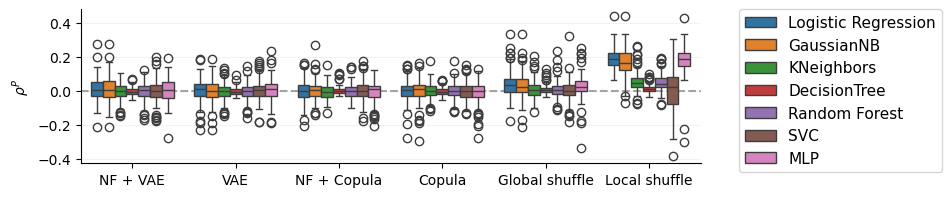

In [134]:
fig, axes = sbp(figsize = (8, 2))

axes.axhline(0, color = "grey", alpha = 0.7, linestyle = "--")
sns.boxplot(data = df_privacy_all, x = "pop_name", y = "score", hue = "classifier")
axes.set_xlabel("")
axes.set_ylabel(r"$\rho^P$")
#axes.legend(fontsize = 18, markerscale = 10, title_fontsize = 18,bbox_to_anchor = (1.05, 0.95)).set_title("")
axes.legend(fontsize = 11, bbox_to_anchor = (1.05, 1.05)).set_title("")

axes.yaxis.grid(color = "gray", alpha = 0.1, linestyle = "-")
axes.spines[["right", "top"]].set_visible(False)

fig.savefig("../paper/boxplots_privacy_all_classifiers.pdf", format = "pdf", bbox_inches='tight')